In [13]:
import numpy as np
from sklearn import random_projection
import pickle
import matplotlib.pyplot as plt

In [5]:
with open("parent_record.p", "rb") as f:
    pr = np.array(pickle.load(f))

In [265]:
# pr = np.load('pr_guppies_orig_params_new_fit.npy')

In [6]:
pr.shape

(1000, 1000, 4, 10)

In [7]:
pr_alleles = pr.reshape(1000,1000, 40) 

In [8]:
pr_alleles.shape

(1000, 1000, 40)

In [9]:
pr_pops = np.mean(pr_alleles, axis=1)

In [10]:
rng = np.random.RandomState(42)
transformer = random_projection.GaussianRandomProjection(random_state=rng)

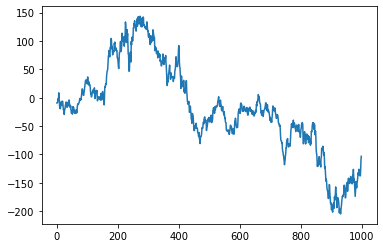

In [14]:
plt.plot(pr_pops[:,5]);

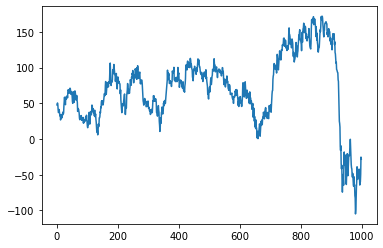

In [15]:
plt.plot(pr_pops[:,7]);

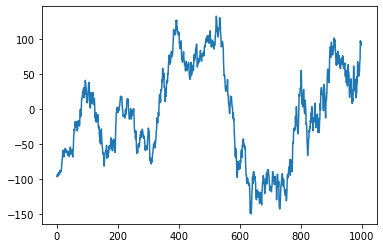

In [16]:
plt.plot(pr_pops[:,8]);

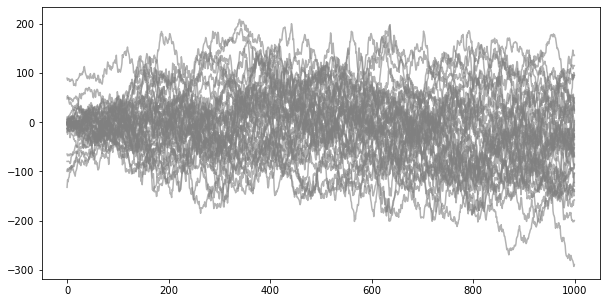

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(pr_pops, c='grey', alpha=0.6);
# plt.plot(pr_pops[:,7], c='black', alpha=0.7);
# plt.plot(pr_pops[:,5], c='orange', alpha=0.7);
fig = plt.gcf()
# fig.savefig('allele_fig.pdf')

In [1]:
from nolitsa import dimension, delay, lyapunov

ModuleNotFoundError: No module named 'nolitsa'

In [259]:
x = pr_pops[:, 0]

In [260]:
dim = np.arange(1, 10 + 1)
f1, f2, f3 = dimension.fnn(x, tau=1, dim=dim, window=10, metric='euclidean')

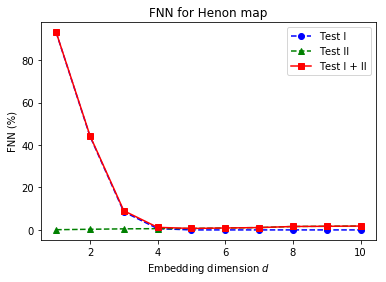

In [261]:
dim = np.arange(1, 10 + 1)
f1, f2, f3 = dimension.fnn(x, tau=1, dim=dim, window=10, metric='euclidean')

plt.title(r'FNN for Henon map')
plt.xlabel(r'Embedding dimension $d$')
plt.ylabel(r'FNN (%)')
plt.plot(dim, 100 * f1, 'bo--', label=r'Test I')
plt.plot(dim, 100 * f2, 'g^--', label=r'Test II')
plt.plot(dim, 100 * f3, 'rs-', label=r'Test I + II')
plt.legend()

plt.show()

In [199]:
from nolitsa import surrogates, d2, data

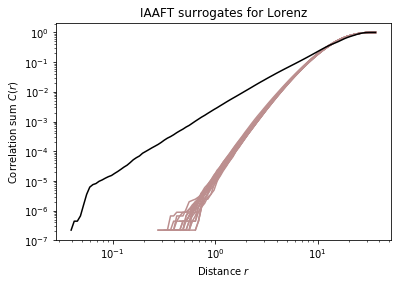

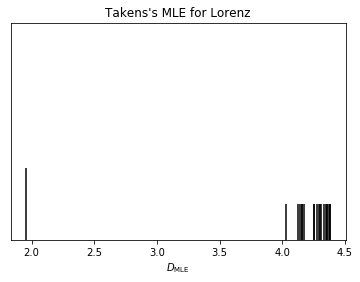

In [200]:
x = data.lorenz(x0=[-13.5, -16.0, 31.0], length=(2 ** 12))[1][:, 0]
x = x[422:3547]

mle = np.empty(19)

# Compute 19 IAAFT surrogates and compute the correlation sum.
for k in range(19):
    y = surrogates.iaaft(x)[0]
    r, c = d2.c2_embed(y, dim=[5], tau=5, window=100)[0]

    # Compute the Takens MLE.
    r_mle, mle_surr = d2.ttmle(r, c, zero=False)
    i = np.argmax(r_mle > 0.5 * np.std(y))
    mle[k] = mle_surr[i]

    plt.loglog(r, c, color='#BC8F8F')

r, c = d2.c2_embed(x, dim=[5], tau=5, window=100)[0]

# Compute the Takens MLE.
r_mle, true_mle = d2.ttmle(r, c, zero=False)
i = np.argmax(r_mle > 0.5 * np.std(x))
true_mle = true_mle[i]

plt.title('IAAFT surrogates for Lorenz')
plt.xlabel('Distance $r$')
plt.ylabel('Correlation sum $C(r)$')
plt.loglog(r, c, color='#000000')

plt.figure(2)
plt.title('Takens\'s MLE for Lorenz')
plt.xlabel(r'$D_\mathrm{MLE}$')
plt.vlines(mle, 0.0, 0.5)
plt.vlines(true_mle, 0.0, 1.0)
plt.yticks([])
plt.ylim(0, 3.0)

plt.show()

In [236]:
x = pr_pops[:, 3]

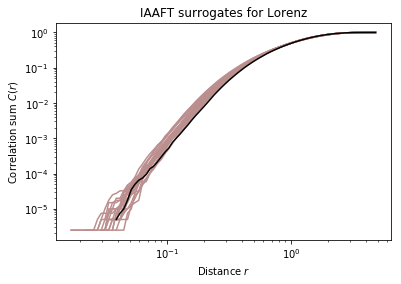

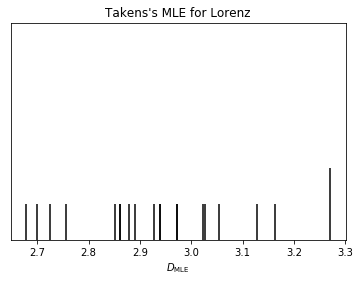

In [262]:
mle = np.empty(19)

# Compute 19 IAAFT surrogates and compute the correlation sum.
for k in range(19):
    y = surrogates.iaaft(x)[0]
    r, c = d2.c2_embed(y, dim=[5], tau=1, window=100)[0]

    # Compute the Takens MLE.
    r_mle, mle_surr = d2.ttmle(r, c, zero=False)
    i = np.argmax(r_mle > 0.5 * np.std(y))
    mle[k] = mle_surr[i]

    plt.loglog(r, c, color='#BC8F8F')

r, c = d2.c2_embed(x, dim=[5], tau=1, window=100)[0]

# Compute the Takens MLE.
r_mle, true_mle = d2.ttmle(r, c, zero=False)
i = np.argmax(r_mle > 0.5 * np.std(x))
true_mle = true_mle[i]

plt.title('IAAFT surrogates for Lorenz')
plt.xlabel('Distance $r$')
plt.ylabel('Correlation sum $C(r)$')
plt.loglog(r, c, color='#000000')

plt.figure(2)
plt.title('Takens\'s MLE for Lorenz')
plt.xlabel(r'$D_\mathrm{MLE}$')
plt.vlines(mle, 0.0, 0.5)
plt.vlines(true_mle, 0.0, 1.0)
plt.yticks([])
plt.ylim(0, 3.0)

plt.show()

In [225]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(pr_pops[:, 15])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.348062
p-value: 0.012862
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


In [167]:
r = delay.acorr(x)

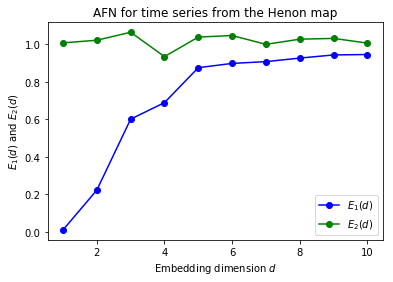

In [244]:
dim = np.arange(1, 10 + 2)
E, Es = dimension.afn(x, tau=1, dim=dim, window=5)
E1, E2 = E[1:] / E[:-1], Es[1:] / Es[:-1]
plt.title(r'AFN for time series from the Henon map')
plt.xlabel(r'Embedding dimension $d$')
plt.ylabel(r'$E_1(d)$ and $E_2(d)$')
plt.plot(dim[:-1], E1, 'bo-', label=r'$E_1(d)$')
plt.plot(dim[:-1], E2, 'go-', label=r'$E_2(d)$')
plt.legend()


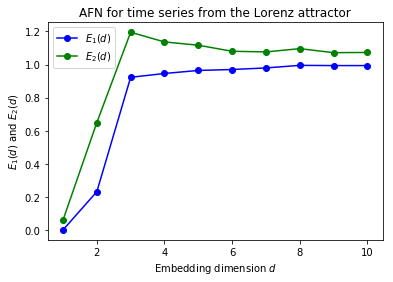

In [176]:
from nolitsa import data, dimension
import matplotlib.pyplot as plt
import numpy as np

# Generate data.
x = data.lorenz()[1][:, 0]

# AFN algorithm.
dim = np.arange(1, 10 + 2)
E, Es = dimension.afn(x, tau=5, dim=dim, window=20)
E1, E2 = E[1:] / E[:-1], Es[1:] / Es[:-1]

plt.title(r'AFN for time series from the Lorenz attractor')
plt.xlabel(r'Embedding dimension $d$')
plt.ylabel(r'$E_1(d)$ and $E_2(d)$')
plt.plot(dim[:-1], E1, 'bo-', label=r'$E_1(d)$')
plt.plot(dim[:-1], E2, 'go-', label=r'$E_2(d)$')
plt.legend()

plt.show()

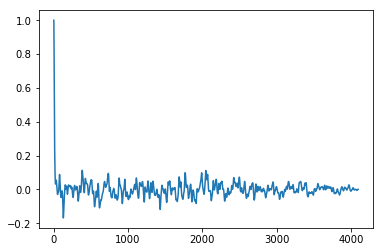

In [169]:
plt.plot(r)

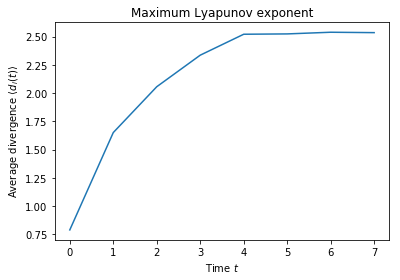

In [151]:
# Time delay.
tau = 1

# Embedding dimension.
dim = [4]

d = lyapunov.mle_embed(x, dim=dim, tau=tau, maxt=8)[0]
t = np.arange(8)

plt.title('Maximum Lyapunov exponent')
plt.xlabel(r'Time $t$')
plt.ylabel(r'Average divergence $\langle d_i(t) \rangle$')
plt.plot(t, d)
# plt.plot(t, t * 0.419 + d[0], '--')

plt.show()

In [67]:
import skccm as ccm

In [245]:
lag = 1
embed = 4
e1 = ccm.Embed(pr_pops[:, 3])
e2 = ccm.Embed(pr_pops[:, 3])
X1 = e1.embed_vectors_1d(lag,embed)
X2 = e2.embed_vectors_1d(lag,embed)

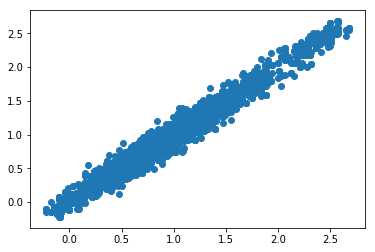

In [246]:
plt.scatter(X2[:-lag], np.roll(X2,-lag)[:-lag])

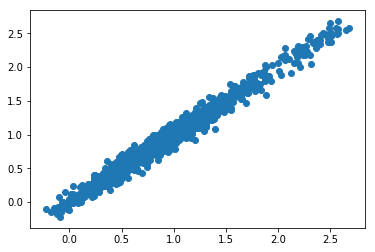

In [247]:
plt.scatter(X2[:,0], X2[:,1])

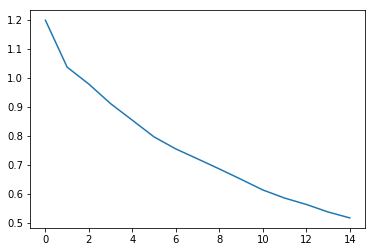

In [248]:
plt.plot(e2.mutual_information(15))

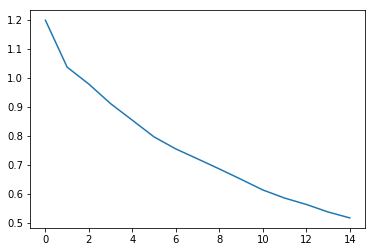

In [249]:
plt.plot(e1.mutual_information(15))